Mariana Gómez Cuartas \
Universidad de Antioquia

<a href="https://colab.research.google.com/github/marianagomezcuartas/Relatividad/blob/main/codigos/cuaderno2(1.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías

In [1]:
%pip install -q numpy matplotlib celluloid IPython ipywidgets pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from ipywidgets import interact
import pandas as pd

In [3]:
plt.rcParams.update({'font.size': 14})

# Capítulo 1.3: consecuencias de las transformaciones de Lorentz (pp. 24-30)


En esta sección vamos a estudiar lo que ven diferentes observadores en cuanto a la tasa en la que se modifican los relojes, la longgitud de cuerdas y la simultaneidad de eventos.

## Dilatación temporal

Una de las consecuencias más destacadas de la relatividad especial es que los relojes en movimiento avanzan más lentamente que los relojes en reposo; es decir, cualquier observador incercial va observar que los relojes usados por otro observador incercial, en movimiento uniforme relativo a él, avanzan más lentamente que los suyos. 

Particularmente, si un observador A tiene un reloj en reposo y otro observador B tiene un reloj en movimiento uniforme respecto al primero, el observador A va a medir que el reloj de B avanza más lentamente que su propio reloj; pero si el observador B hace una medición, él verá que el reloj de A avanza más lentamente que el suyo. Ambos estarán en lo correcto, y la razón es que el tiempo no es absoluto. 

Vamos a considerar particulas de laboratorio para explicar este problema. Una partícula de corta vida es considerada puntual, talque en un evento **1** es creada y en un evento **2** decae. El intervalo de tiempo entre estos dos eventos, medido en un marco de referencia incercial, es el tiempo de vida de la partícula.


Consideremos el tiempo de vida de una partícula observado por los observadores incerciales O y O'. 

- El observador O usa un marco de referencia S, el cual es el marco de referencia de laboratorio, en el cual la partícula viaja con una velocidad constante V en la dirección x+. 

- El observador O' usa un marco de referencia S' que se mueve con la partícula. Este es conocido con el marco de referencia en reposo.

En la siguen animación se ilustran los marcos de referencia S y S' asociados con el movimiento de la partícula.

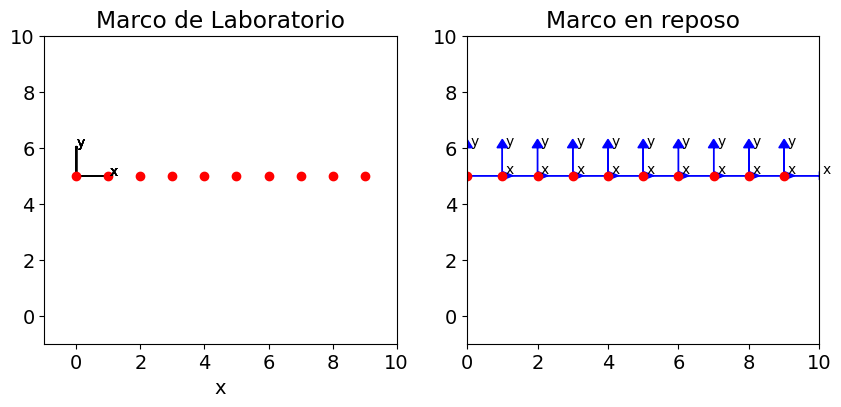

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

V = 1.0         # Velocidad de la partícula
x_max = 10      # Límite del eje x
frames = 10

# Setup de la figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
camera = Camera(fig)

for t in range(frames):
    x = V * t   # posición de la partícula

    # LABORATORIO
    ax1.set_xlim(0, x_max)
    ax1.set_ylim(-1, 10)
    ax1.set_xlabel("x")
    ax1.set_title("Marco de Laboratorio")
    ax1.set_xlim(-1, 10)
    ax1.set_ylim(-1, 10)
    ax1.plot(x, 5, 'ro')  # partícula

    # Ejes fijos 
    ax1.arrow(0, 5, 1, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax1.arrow(0, 5, 0, 1, head_width=0.05, head_length=0.05, fc='black', ec='black')
    ax1.text(1.05, 5, 'x', fontsize=10)
    ax1.text(0, 6.05, 'y', fontsize=10)

    # REPOSO
    ax2.set_xlim(0, x_max)
    ax2.set_ylim(-1, 10)
    ax2.set_title("Marco en reposo")

    ax2.plot(x, 5, 'ro')  #partícula
    ax2.arrow(x, 5, 1, 0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')  # eje x'
    ax2.arrow(x, 5, 0, 1, head_width=0.3, head_length=0.3, fc='blue', ec='blue')  # eje y'
    ax2.text(x+1.1, 5.1, 'x', fontsize=10)
    ax2.text(x+0.1, 6.1, 'y', fontsize=10)
    
    camera.snap()


In [5]:
animation = camera.animate(interval=500, repeat=False)
HTML(animation.to_jshtml())

De acuerdo con el observador O' el nacimiento y decaimiento de la partícula (estacionaria), ocurre en el mismo lugar; es decir, el evento 1 ocurre en las coordenadas (t1', x') y el evento 2 ocurre en las coordenadas (t2', x'). Por lo tanto, el intervalo de tiempo entre los eventos 1 y 2 es la diferencia entre los tiempos de los eventos 1 y 2, medidos por el observador O' (que está en reposo con respecto a la partícula). 

Este es el que se conoce como el tiempo de vida de la partícula, y viene dado por:
$$\Delta t' = t_2' - t_1'$$

En relatividad especial, el tiempo entre dos eventos medidos en un marco tal que el evento ocurre en el mismo lugar es conocido como el **tiempo propio**, y se denota como $\Delta \tau$.

Entonces, para este ejemplo particular, en el marco S', el intervalo de tiempo y espacio que separa a los eventos 1 y 2 es:
$$\Delta t' = \Delta \tau = t_2' - t_1' $$
$$\Delta x' = x_2' - x_1' = 0$$

Ahora bien, de acuerdo con el observador O, el evento 1 ocurre en las coordenadas (t1, x1) y el evento 2 ocurre en las coordenadas (t2, x2). Por lo tanto, el intervalo de tiempo y espacio entre los eventos 1 y 2 es:

$$\Delta T = \Delta t = t_2 - t_1$$
$$\Delta x = x_2 - x_1$$


Estos eventos e intervalos se pueden representar por medio del siguiente gráfico:

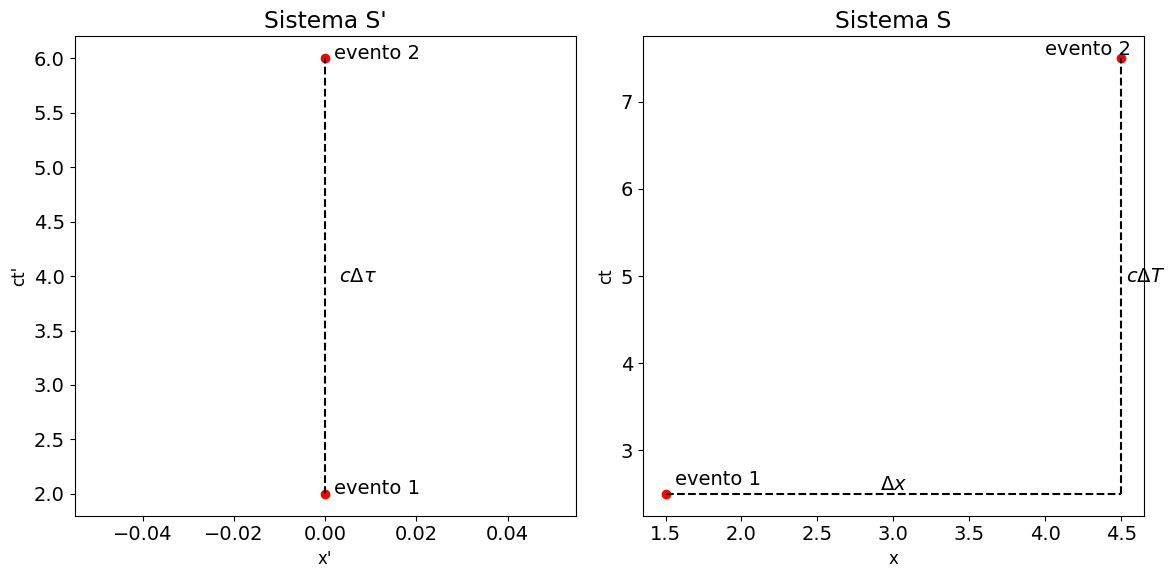

In [6]:
# Parámetros
v = 0.6   # velocidad en unidades de c
c=1
gamma = 1 / np.sqrt(1 - v**2/c**2)

# Sistema S' (todos los eventos en x' = 0)
x_prime = 0
ct1_prime = 2
ct2_prime = 6

# Transformaciones inversas de Lorentz → Sistema S
x1 = gamma * (x_prime + v * ct1_prime/c)
x2 = gamma * (x_prime + v * ct2_prime/c)
ct1 = gamma * (ct1_prime/c + v * x_prime/c)
ct2 = gamma * (ct2_prime/c + v * x_prime/c)

#graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ================== Sistema S' ==================
ax1.set_title("Sistema S'")

# Eventos
ax1.plot(x_prime, ct1_prime, 'ro')
ax1.plot(x_prime, ct2_prime, 'ro')

# Línea vertical
ax1.plot([x_prime, x_prime], [ct1_prime, ct2_prime], 'k--')

# Etiquetas
ax1.text(x_prime + 0.003, (ct1_prime + ct2_prime)/2, r'$c\Delta \tau$', va='center')
ax1.text(x_prime + 0.002, ct1_prime - 0.004, 'evento 1')
ax1.text(x_prime + 0.002, ct2_prime - 0.004, 'evento 2')

# Ejes
ax1.set_xlabel("x'", fontsize=12)
ax1.set_ylabel("ct'", fontsize=12)

# ================== Sistema S ==================
ax2.set_title("Sistema S")

# Eventos
ax2.plot(x1, ct1, 'ro')
ax2.plot(x2, ct2, 'ro')

# Líneas punteadas
ax2.plot([x1, x2], [ct1, ct1], 'k--')  # Δx
ax2.plot([x2, x2], [ct1, ct2], 'k--')  # cΔT

# Etiquetas
ax2.text((x1 + x2)/2, ct1 + 0.05, r'$\Delta x$', ha='center')
ax2.text(x2 + 0.03, (ct1 + ct2)/2, r'$c\Delta T$', va='center')
ax2.text(x1 + 0.06, ct1 + 0.1, 'evento 1')
ax2.text(x2 - 0.5, ct2 + 0.04, 'evento 2')

# Ejes
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("ct", fontsize=12)


plt.tight_layout()
plt.show()


Ahora bien, recordamos de la sección anterior la ecuación: 

$$\Delta t = \gamma \left( \Delta t' + \frac{V}{c^2} \Delta x' \right)$$

Esta expresión involucra tres intervalos conocidos: $\Delta t$, $\Delta t'$, y $\Delta x'$, con lo cual podemos reemplazar y obtener:

$$\Delta T = \gamma \left( \Delta \tau + \frac{V}{c^2} \cdot 0 \right)$$

es decir,

$$\Delta T = \gamma \Delta \tau$$

Esto significa que la partícula parece vivir más en el marco del laboratorio que en su propio marco en reposo. En otras palabras, el tiempo propio de la partícula es menor que el tiempo medido por el observador O. Esto se conoce como **dilatación temporal**.

Este efecto es una prueba de la teoría de la relatividad especial, y se ha verificado experimentalmente en muchas ocasiones. Por ejemplo, los muones generados por rayos cósmicos tienen una vida media corta en su marco en reposo, pero se observan en la Tierra durante un tiempo mucho mayor debido a su alta velocidad. Veamos más detalladamente este caso del muón:

In [7]:
def tiempo_dilatado(v, tau):
    """
    Parámetros:
    v : float
        Velocidad de la partícula (en unidades de c).
    tau : float
        Tiempo propio (en segundos)(intervalo de tiempo).
    
    Retorna:
    float
        Tiempo dilatado (en segundos).
    """
    c = 1  # velocidad de la luz en unidades de c
    gamma = 1 / np.sqrt(1 - v**2/c**2)
    return gamma * tau

Si un muón vive 2.2 microsegundos en su marco de referencia, ¿cuánto tiempo vive en el marco de referencia de la Tierra? Supongamos que el muón viaja a una velocidad de 3c/5. Veamoslo:

In [8]:
tau = 2.2e-6  # tiempo propio en segundos
v = 3/5  # velocidad en unidades de c
t_dilatado = tiempo_dilatado(v, tau)
print(f'el tiempo que vive el muón en el marco de referencia de la Tierra es {t_dilatado:.2e} segundos')

el tiempo que vive el muón en el marco de referencia de la Tierra es 2.75e-06 segundos


Por medio del siguiente gráfico vamos a ver cómo varía el tiempo dilatado con respecto a la velocidad (en unidades de c), para un valor fijo de $\Delta \tau$ = 2.2 microsegundos. Ahí se muestran los valores empleados en el ejemplo anterior por medio de lineas punteadas.

Del gráfico se puede observar:

- Para velocidades bajas, el tiempo dilatado es aproximadamente igual al tiempo propio.
- A medida que la velocidad se acerca a c, el tiempo dilatado se incrementa rápidamente.

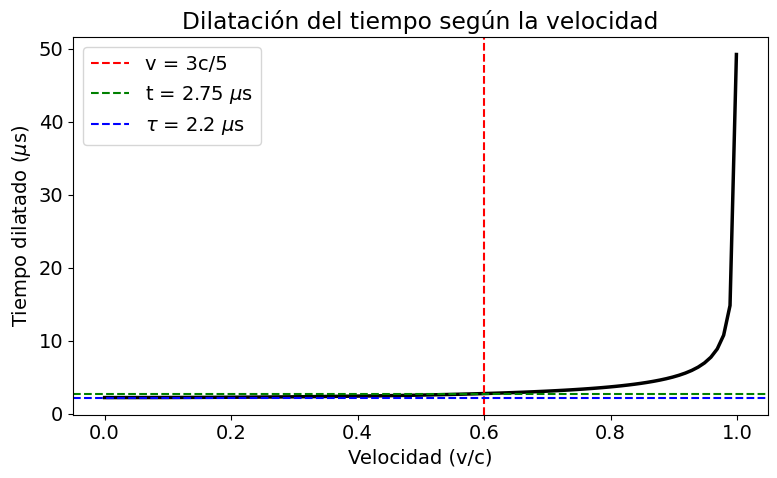

In [9]:
# velocidades
v = np.linspace(0, 0.999, 100)
tau = 2.2e-6  # tiempo propio en segundos (2.2 microsegundos)

# Calcular tiempos dilatados
t_dilatado = tiempo_dilatado(v, tau)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(v, t_dilatado * 1e6, color='black', linewidth=2.5)  # en microsegundos
plt.xlabel('Velocidad (v/c)')
plt.ylabel('Tiempo dilatado ($\\mu$s)')
plt.title('Dilatación del tiempo según la velocidad')
plt.axvline(x=3/5, color='r', linestyle='--', label='v = 3c/5')
plt.axhline(y=2.75, color='g', linestyle='--', label='t = 2.75 $\\mu$s')
plt.axhline(y=2.2, color='b', linestyle='--', label='$\\tau$ = 2.2 $\\mu$s')
plt.legend()
plt.tight_layout()
plt.show()

## Contracción de Longitud

Para la explicación de esta sección se hará uso de la longitud de una cuerda.

En cualquier marco de referencia inercial, la **longitud de una cuerda** es la distancia entre los extremos de la cuerda en un instante dado, medido en ese marco.

Es así que en un marco de referencia S, en el cual **la cuerda se mueve a una velocidad V** en la dirección en la que está orientada (x+), la longitud de la cuerda se puede relacionar con dos eventos 1 y 2:

- El evento 1 ocurre en el extremo izquierdo en un tiempo t, es decir, en las coordenadas (t, x1).
- El evento 2 ocurre en el extremo derecho en el mismo tiempo t, es decir, en las coordenadas (t, x2).

Por lo tanto, la longitud de la cuerda en el marco S en el tiempo t es:

$$L = \Delta x = x_2 - x_1$$

Ahora bien, si consideramos estos mismos dos eventos en un marco de referencia S', en el cual **la cuerda está orientada en el eje x'+ y en reposo**, los eventos serán de esta forma:

- El evento 1 ocurre en el extremo izquierdo en un tiempo t', es decir, en las coordenadas (t1', x1').
- El evento 2 ocurre en el extremo derecho en el mismo tiempo t', es decir, en las coordenadas (t2', x2).

Es importante tener en cuenta que no necesariamente t1' = t2', es decir, no hay nada que nos garantice la simultaneidad. Lo único de lo que sí tenemos certeza es que los puntos extremos de la cuerda siempre estarán en x1' y x2' en el marco S', y que la longitud de la cuerda en el marco S' es:

$$L_p = \Delta x' = x_2' - x_1'$$

$L_p$ es lo que se conoce como **longitud propia** de la cuerda, y es la longitud medida en su propio marco en reposo.

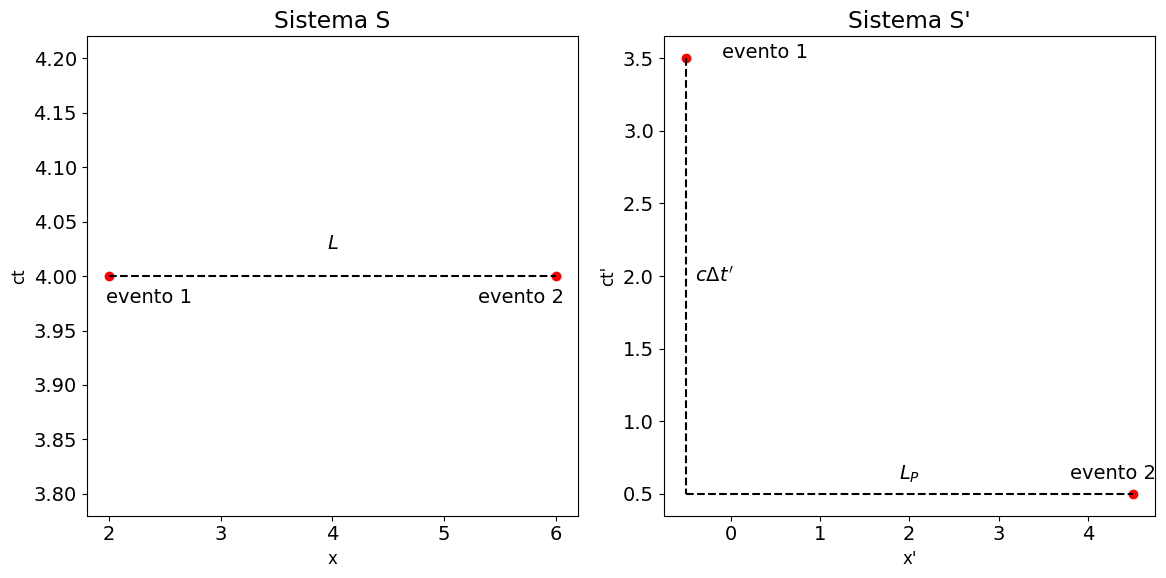

In [10]:
# Parámetros
v = 0.6   # velocidad en unidades de c
c = 1
gamma = 1 / np.sqrt(1 - v**2/c**2)

# === Sistema S: eventos simultáneos en t ===
ct = 4
t = ct / c
x1 = 2
x2 = 6

# Transformaciones de Lorentz → Sistema S'
x1_prime = gamma * (x1 - v * ct/c)
x2_prime = gamma * (x2 - v * ct/c)
ct1_prime = gamma * (ct - v * x1 / c)
ct2_prime = gamma * (ct - v * x2 / c)


# Crear figura con 2 subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ================== Sistema S ==================
ax1.set_title("Sistema S")

# Eventos
ax1.plot(x1, ct, 'ro')
ax1.plot(x2, ct, 'ro')

# Línea horizontal
ax1.plot([x1, x2], [ct, ct], 'k--')


# Etiquetas
ax1.text((x1 + x2)/2, ct + 0.025, r'$L$', ha='center')
ax1.text(x1 - 0.025, ct - 0.025, 'evento 1')
ax1.text(x2 - 0.7, ct - 0.025, 'evento 2')

# Ejes
ax1.set_xlabel("x", fontsize=12)
ax1.set_ylabel("ct", fontsize=12)

# ================== Sistema S' ==================
ax2.set_title("Sistema S'")

# Eventos
ax2.plot(x1_prime, ct1_prime, 'ro')
ax2.plot(x2_prime, ct2_prime, 'ro')

# Línea vertical: trayectoria
ax2.plot([x1_prime, x1_prime], [ct1_prime, ct2_prime], 'k--')

# Línea horizontal: separación espacial
ax2.plot([x1_prime, x2_prime], [ct2_prime, ct2_prime], 'k--')

# Etiquetas
ax2.text(x1_prime + 0.1, (ct1_prime + ct2_prime)/2, r'$c\Delta t^{\prime}$', va='center')
ax2.text((x1_prime + x2_prime)/2, ct2_prime + 0.1, r"$L_P$", ha='center')
ax2.text(x1_prime + 0.4, ct1_prime, 'evento 1')
ax2.text(x2_prime - 0.7, ct2_prime + 0.1, 'evento 2')

# Ejes
ax2.set_xlabel("x'", fontsize=12)
ax2.set_ylabel("ct'", fontsize=12)


plt.tight_layout()
plt.show()


Ahora bien, recordamos de la sección anterior la ecuación: 

$$\Delta x' = \gamma (\Delta x - V \Delta t)$$

Esta expresión involucra tres intervalos conocidos: $\Delta x$, $\Delta x'$, y $\Delta t$, con lo cual podemos reemplazar y obtener:


$$L_p = \gamma (L - V \Delta t)$$
$$L_p = \gamma (L - V \cdot 0)$$
$$L_p = \gamma L$$
$$L = \frac{L_p}{\gamma}$$

Ahora bien, como $\gamma > 1$, esta expresión nos indica que la cuerda se observa más corta en el marco de laboratorio que en el marco en reposo (el propio). Esto se conoce como **contracción de longitud**.

En general, cualquier cuerpo se observa más corto en la dirección de su movimiento (esto no significa que se vea más corto --> recordando que ver es diferente a observar).

Por medio del siguiente interactivo, se muestra el efecto de constracción de longitudes conforme cambia la velocidad de movimiento de un objeto.

En esta, el eje x funciona como una "regla", la cual mide la longitud de un objeto que se contrae. A medida que la velocidad aumenta, la longitud medida en el eje x se reduce. 

In [11]:
#función que calcula la contracción de la longitud
def contraccion_longitud(V, Lp=1):
    """
    Parámetros:
    V : Velocidad de cuerpo en una dirección de movimiento (en unidades de c).
    Lp : Longitud propia (en metros).
    
    Retorna : Longitud medida por un observador en reposo (en metros).
    """

    c = 1 
    V = np.array(V)  
    if np.any(V >= c):
        raise ValueError("La velocidad V debe ser menor que la velocidad de la luz (c).")
    
    gamma = 1 / np.sqrt(1 - V**2/c**2)
    L = Lp / gamma
    
    return L

In [12]:
#definimos la función con la cual se quiere que trabaje el interactivo

def representacion_long_contr(V):
    """
    Parámetros:
    V : Velocidad de la partícula (en unidades de c).
    
    Retorna : Longitud medida por un observador en reposo (en metros).
    """
    Lp = 1.5  # longitud propia (en metros)
    L = contraccion_longitud(V, Lp)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4))

    # Marco de laboratorio
    ax1.set_xticks(np.arange(0, 2, 0.2))
    ax1.set_yticks([])
    ax1.set_xlim(0, 2)
    ax1.plot([0, L], [0, 0], 'r-', linewidth=3)
    ax1.set_title("Marco de laboratorio")
    ax1.set_xlabel("x (m)")
    ax1.grid(True, axis='x', linestyle=':', alpha=0.6)

    # Marco propio
    ax2.set_xticks(np.arange(0, 2, 0.2))
    ax2.set_yticks([])
    ax2.set_xlim(0, 2)
    ax2.plot([0, Lp], [0, 0], 'b-', linewidth=3)
    ax2.set_title("Marco propio")
    ax2.set_xlabel("x' (m)")
    ax2.grid(True, axis='x', linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

interact(representacion_long_contr, V=(0, 0.99, 0.01))


interactive(children=(FloatSlider(value=0.49, description='V', max=0.99, step=0.01), Output()), _dom_classes=(…

<function __main__.representacion_long_contr(V)>

Ahora, por medio de un gráfico vamos a mostrar como es la variación de la longitud contra la velocidad (en unidades de c), para un valor fijo de $L_p$ = 1.5 metros. Ahí se muestran los valores empleados en el ejemplo anterior por medio de lineas punteadas.

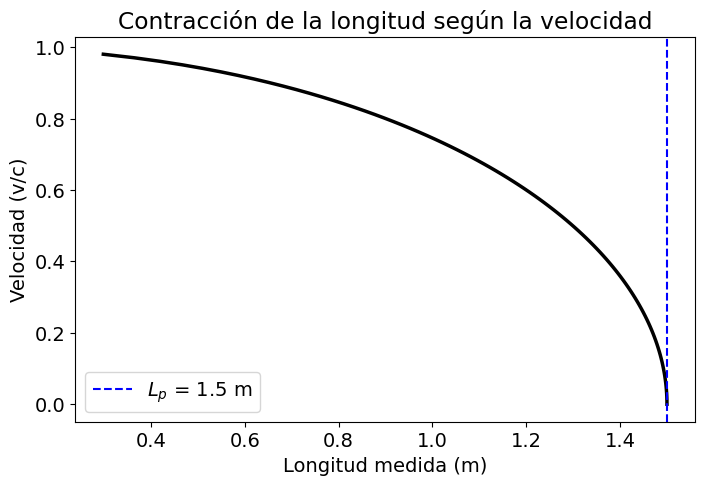

In [14]:
plt.figure(figsize=(8, 5))

#valores de velocidad
v = np.linspace(0, 0.98, 100)

#longitud propia
Lp = 1.5  # metros

#longitud de laboratorio
L = contraccion_longitud(v, Lp)
plt.plot(L, v, color='black', linewidth=2.5)  # longitud medida por un observador en reposo
plt.xlabel('Longitud medida (m)')
plt.ylabel('Velocidad (v/c)')
plt.title('Contracción de la longitud según la velocidad')
plt.axvline(x=1.5, color='b', linestyle='--', label='$L_p$ = 1.5 m')
plt.legend()

Del anterior gráfico y de la forma de la ecuación se observa:

- Para velocidades bajas, la longitud medida es aproximadamente igual a la longitud propia.
- A medida que la velocidad se acerca a c, la longitud medida se reduce a un mínimo.
- La longitud medida nunca puede ser mayor que la longitud propia
- La longitud medida nunca puede ser cero, es decir, la longitud de un objeto no puede ser cero (a menos que la longitud propia sea cero).

## Relatividad de la Simultaneidad

Dos eventos se dice que son simultaneos en un marco de referencia inercial cuando ocurren al mismo tiempo.

Tal como se mencionó previamente, que un evento sea simultaneo en un marco de referencia inercial no implica que sea simultáneo en otro marco de referencia inercial. Esto se conoce como la **relatividad de la simultaneidad**.

De la sección anterior recordamos la ecuación:

$$\Delta t' = \gamma (\Delta t - V \Delta x / c^2)$$

Entonces, si dos eventos 1 y 2 son simultaneos en el marco de referencia S, es decir, $\Delta t = 0$, y ocurren en diferentes lugares, es decir, $\Delta x = L$, entonces la ecuación se convierte en:

$$\Delta t' = \gamma \left( 0 - \frac{V L}{c^2} \right)$$
$$\Delta t' = - \gamma \frac{ V L}{c^2}$$

## Efecto Dopler

El efecto Dopler es un fenómeno físico que rinde cuenta de la variación de la frecuencia de una onda cuando el emisor y el receptor están en movimiento relativo. 

A pesar de que se trata de un fenómeno clásico, una de las consecuencuas de la relatividad especial fué reconocer que la fórmula que se ha usado tradicionalmente para describir el efecto estaba mal.

Para ver cual es la expresión correcta vamos a realizar lo siguiente:

- Consideremos una lámpara en reposo en el origen de un sistema de referencia inercial S, la cual emite ondas electromagnéticas a una frecuencia $f_{em}$ medida en el sistema de referencia S.

- Ahora, supongamos que la lámpara es observada desde otro sistema de referencia inercial S', el cual se mueve con una velocidad V respecto al sistema S. Es así, que un detector en el origen de S' mide la frecuencia $f_{rec}$ de las ondas electromagnéticas emitidas por la lámpara.

**La idea va ser determinar la relación entre la frecuencia emitida $f_{em}$ y la frecuencia recibida $f_{rec}$.**

Las ondas emitidas tienen normalmente nodos separados por una longitud de onda: 
$$\lambda_{em} = \frac{c}{f_{em}}$$

, medido en S. En este mismo marco de referencia, el intervalo de tiempo entre la emisión de dos nodos consecutivos es:

$$\Delta t = T_{em}= \frac{\lambda_{em}}{c} = \frac{1}{f_{em}}$$

Ahora bien, debido al fenómeno de la dilatación termporal, el intervalo de tiempo entre la emisión de dos nodos consecutivos medido en el sistema S' es:
$$\Delta t' = T_{rec} = \gamma \Delta t = \gamma \frac{1}{f_{em}}$$

Sin embargo, este no es el tiempo que separa la llegada de dos nodos consecutivos al detector. Para determinar el tiempo que separa la llegada de dos nodos consecutivos al detector, es necesario tener en cuenta la velocidad V del sistema S' respecto al sistema S. 
Lo que sucede, es que durante el tiempo $\Delta t'$ que tarda en llegar un nodo al detector, el sistema S' se ha desplazado una distancia $V \Delta t'$. Por lo tanto, el intervalo de tiempo entre la llegada de dos nodos consecutivos al detector, medido por S' es:

$$\Delta t' + V \Delta t'/c$$

Esto representa el periodo recibido por el detector, y se puede escribir como:

$$\frac{1}{f_{rec}}=\Delta t' + \frac{V \Delta t'}{c}$$

, y como S' es quien mide, verá el tiempo dilatado, es decir, $\Delta t' = \gamma \Delta t$, entonces podemos escribir:


$$\frac{1}{f_{rec}} = \gamma \Delta t \left(1 + \frac{V}{c}\right)$$

Ahora bien, siendo $\Delta t$ el recíproco de la frecuencia emitida y reescribiendo $\gamma = \frac{1}{\sqrt{(1-V/c)(1+V/c)}}$, podemos escribir la relación entre la frecuencia emitida y la frecuencia recibida como:
$$\frac{1}{f_{rec}} = \frac{1}{f_{em}} \frac{1}{\sqrt{(1-V/c)(1+V/c)}} \left(1 + \frac{V}{c}\right)$$

, lo cual se puede organizar para obtener:

$$f_{rec} = f_{em} \sqrt{\frac{c-V}{c+V}}$$

Cuando S' se aleja de S, la frecuencia recibida es menor que la frecuencia emitida (redshift), y cuando S' se acerca a S, la frecuencia recibida es mayor que la frecuencia emitida (blueshift). Este fenómeno se conoce como **efecto Dopler relativista**.


En términos de longitud de onda, la anterior ecuación se escribe como:

$$\lambda_{rec} = \lambda_{em} \sqrt{\frac{c+V}{c-V}}$$

, pues recordamos que $\lambda = \frac{c}{f}$.

Sea $\beta = \frac{V}{c}$, reescribimos la anterior relación:

$$\lambda_{rec} = \lambda_{em} \sqrt{\frac{1+\beta}{1-\beta}}$$

Elevando al cuadrado a ambos lados:

$$\frac{\lambda_{rec}^2}{\lambda_{em}^2} = \frac{1+\beta}{1-\beta}$$

Despejando $\beta$:

$$\beta = \frac{\lambda_{rec}^2 - \lambda_{em}^2}{\lambda_{rec}^2 + \lambda_{em}^2}$$

es decir, la velocidad queda como:

$$V = c \frac{(\frac{\lambda_{rec}}{\lambda_{em}})^2 - 1}{(\frac{\lambda_{rec}}{\lambda_{em}})^2 + 1}$$

**Ejemplo**  
Algunos astrónomos están estudiando un fenómeno inusual cerca del centro de nuestra galaxia, que involucra un chorro de material que contiene sodio. El chorro se mueve casi directamente a lo largo de la línea entre la Tierra y el centro galáctico.  

En un laboratorio, una muestra estacionaria de vapor de sodio absorbe luz de longitud de onda $\lambda = 5850 \times 10^{-10}$ m. Estudios espectroscópicos muestran que la longitud de onda de la línea de absorción de sodio en el espectro del chorro es $\lambda' = 4483 \times 10^{-10}$ m.  

**Preguntas:**  
1. ¿El chorro se está acercando o alejando?  
2. ¿Cuál es la velocidad del chorro relativa a la Tierra?  


Para resolver este problema hacemos uso de la ecuación que acabamos de encontrar, y la plasmamos en la siguiente función:

In [5]:
def velocidad_relativa(lambda_em, lambda_rec, c=3e8):
    """
    Calcula la velocidad relativa de un objeto usando el efecto Doppler relativista.

    Parámetros:
    - lambda_em: Longitud de onda emitida (en reposo) en metros.
    - lambda_rec: Longitud de onda recibida (observada) en metros.
    - c: Velocidad de la luz en m/s (valor por defecto: 3e8 m/s).

    Retorna:
    - V: Velocidad del objeto en m/s. Un valor negativo indica acercamiento, positivo indica alejamiento.
    """
    frac = lambda_rec / lambda_em
    V = c * (frac**2 - 1) / (frac**2 + 1)
    return V

Aplicamos:

In [ ]:
lam_em = 5850e-10  # longitud de onda emitida (en metros)
lam_rec = 4483e-10  # longitud de onda recibida (en metros)
c = 3e8  # velocidad de la luz (en m/s)
V = velocidad_relativa(lam_em, lam_rec)  # calcular la velocidad relativa
print(f"La velocidad relativa del chorro es: {V} m/s")  
print(f"El chorro se acerca a una velocidad de {abs(V/c):.2f} c")  

La velocidad relativa del chorro es: -78011409.43312575 m/s
El chorro se aleja a una velocidad de 0.26 c


De lo anterior se conlcuye que el chorro se está acercando a la Tierra a 26% de la velocidad de la luz.

Para visualizar un poco mejor el efecto doppler hacemos la siguiente animación, en la que se muestra como la longitud de onda varía conforme cambia la velocidad de movimiento de S' con respecto a S (es análogo a ver que la fuente de luz se mueve con respecto a un origen estacionario relacionado con S'):